### Codecademy Capstone Project: Date-A-Scientist

This project is a final capstone project in Codecademy's Data Scientist online course. The task is to use python and machine learning algorithms to answer a specific question, e.g. Codecademy suggested to try to predict the Zodiac sign of a OKCupid user using his personal information. 

My interest lay in a correlation between the user's body_type and the following features: diet, drinks, drugs, smokes. 

(59946, 31)
                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


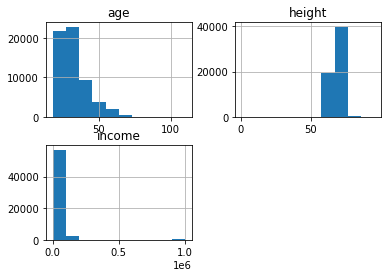

In [44]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Import data
df = pd.read_csv('profiles.csv')

# Take a first look at the data
print(df.shape)
print(df.describe())
df.hist()
df.head()

In [2]:
# Which columns have NaNs? 

(np.sum(df.isna() == True))/df.shape[0]

age            0.000000
body_type      0.088346
diet           0.406950
drinks         0.049795
drugs          0.234878
education      0.110566
essay0         0.091549
essay1         0.126314
essay2         0.160778
essay3         0.191439
essay4         0.175775
essay5         0.180996
essay6         0.229723
essay7         0.207704
essay8         0.320705
essay9         0.210239
ethnicity      0.094752
height         0.000050
income         0.000000
job            0.136756
last_online    0.000000
location       0.000000
offspring      0.593217
orientation    0.000000
pets           0.332316
religion       0.337404
sex            0.000000
sign           0.184433
smokes         0.091949
speaks         0.000834
status         0.000000
dtype: float64

In [3]:
# I am interested in the columns 'body_type', 'diet', 'drinks', 'drugs' and 'smokes'.
# How many NaNs are in these columns? 

(np.sum(df[['body_type', 'diet', 'drinks', 'drugs', 'smokes']].isna() == True))/df.shape[0]

body_type    0.088346
diet         0.406950
drinks       0.049795
drugs        0.234878
smokes       0.091949
dtype: float64

In [4]:
# Diet has most NaNs with over 40%!
# There are some ways to take care of NaNs, like dropping the rows, fill the mean or fill the mode. 
# For now I will try with dropping the NaNs. In a later approach, I would like to see if I can improve my models by 
# filling in the mean or the mode in these columns. 

df_without_nan = df.dropna(subset=['body_type', 'diet', 'drinks','drugs', 'smokes'], axis = 0)

# No NaNs left:
(np.sum(df_without_nan[['body_type', 'diet', 'drinks', 'drugs', 'smokes']].isna() == True))/df_without_nan.shape[0]

body_type    0.0
diet         0.0
drinks       0.0
drugs        0.0
smokes       0.0
dtype: float64

In [5]:
# The label I would like to predict is 'body_type'. Lets have a first look a the body_type column: 

df_without_nan.body_type.value_counts().reset_index()

,index,body_type
0,average,6802
1,fit,5742
2,athletic,5366
3,thin,2191
4,curvy,1843
5,a little extra,1312
6,skinny,804
7,full figured,464
8,overweight,227
9,jacked,191


In [6]:
# We have 12 different body types. To improve the results of the machine learning algorithms, I aggregate the 
# body types to four different main categories: sporty, average, curvy and bad. 

# Mapping of the body types: 

sporty = ['fit', 'athletic', 'thin', 'skinny']
average = ['average']
curvy = ['curvy', 'a little extra', 'full figured']
bad = ['overweight', 'jacked', 'used up', 'rather not say']

body_mapping = {'fit': 'sporty', 
                'athletic': 'sporty', 
                'thin': 'sporty', 
                'skinny': 'sporty',
               'average': 'average',
               'curvy': 'curvy', 
                'a little extra': 'curvy', 
                'full figured': 'curvy',
               'overweight': 'bad', 
                'jacked': 'bad', 
                'used up': 'bad', 
                'rather not say': 'bad'}

df_body_labels = df_without_nan.assign(body_labels = df_without_nan.body_type.map(body_mapping))

# Here are the new, mapped values, now with four different body types: 
df_body_labels.body_labels.value_counts().reset_index()

,index,body_labels
0,sporty,14103
1,average,6802
2,curvy,3619
3,bad,678


In [7]:
# The features, that I would like to use for prediction are: diet, drinks, drugs and smokes. 
# Drinks, drugs and smokes contains categorical data that can be mapped into continuous data.
# E.g. "drinks not at all" = 0, "drinks rarely" = 1, "drinks socially" = 2 ... up to "drinks desperately" = 5. 
# Lets have a look at drinks, drugs and smokes: 

print(df_body_labels.drinks.value_counts())
print(df_body_labels.drugs.value_counts())
print(df_body_labels.smokes.value_counts())

socially       17929
rarely          2896
often           2162
not at all      1789
very often       264
desperately      162
Name: drinks, dtype: int64
never        20339
sometimes     4600
often          263
Name: drugs, dtype: int64
no                20402
sometimes          1688
when drinking      1429
yes                1032
trying to quit      651
Name: smokes, dtype: int64


In [8]:
# Mapping the categorical values to continuous values: 

drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df_body_labels["drinks_code"] = df_body_labels.drinks.map(drink_mapping)

drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
df_body_labels["drugs_code"] = df_body_labels.drugs.map(drugs_mapping)

smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df_body_labels["smokes_code"] = df_body_labels.smokes.map(smokes_mapping)

df_body_labels.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,religion,sex,sign,smokes,speaks,status,body_labels,drinks_code,drugs_code,smokes_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,agnosticism and very serious about it,m,gemini,sometimes,english,single,curvy,2,0,1
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,average,3,1,0
7,31,average,mostly anything,socially,never,graduated from college/university,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,...,christianity,f,sagittarius,no,"english, spanish (okay)",single,average,2,0,0
9,37,athletic,mostly anything,not at all,never,working on two-year college,my names jake.<br />\ni'm a creative guy and i...,i have an apartment. i like to explore and che...,i'm good at finding creative solutions to prob...,i'm short,...,atheism and laughing about it,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single,sporty,0,0,0
11,28,average,mostly anything,socially,never,graduated from college/university,"i was born in wisconsin, grew up in iowa, and ...",i'm currently the youngest member on an intern...,i'm really good at a little bit of everything....,"the way i dress. some days it's hats, other da...",...,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone,average,2,0,0


In [9]:
# The column diet can not be mapped into continuous value. Therefore I apply the one-hot approach to generate
# new columns with 1 and 0 for the different diet types. 

df_body_labels.diet.value_counts()

mostly anything        12290
anything                4357
strictly anything       3341
mostly vegetarian       2322
mostly other             741
strictly vegetarian      632
vegetarian               366
strictly other           310
other                    233
mostly vegan             222
strictly vegan           160
vegan                     86
mostly kosher             64
mostly halal              36
strictly halal            15
strictly kosher           14
halal                      7
kosher                     6
Name: diet, dtype: int64

In [10]:
# First: Prepare a list of values in diet column: 

diet_values = df_body_labels.diet.unique().tolist()
#print(diet_values)

# Second: Iterate through the list items and add a new column named after this item with the value 1 or 0: 
for item in diet_values:
    df_body_labels[item] = np.where(df_body_labels.diet.str.match(item), 1, 0)

# Third: Have a look at the new shape of the dataframe, now with considerably more columns: 
df_body_labels.shape

(25202, 53)

In [14]:
# Prepare features and labels for prediction. 
# Features: Idea of trying out different combinations (e.g. only food variables to predict body type or
# all no food variables to predict body type.)

df_features_all = df_body_labels[['drinks_code','drugs_code', 'smokes_code'] + diet_values]
x = df_features_all.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_features_all = pd.DataFrame(x_scaled, columns=df_features_all.columns)
df_labels = df_body_labels['body_labels']

df_features_all.head()

,drinks_code,drugs_code,smokes_code,strictly anything,mostly other,mostly anything,mostly vegetarian,strictly vegan,anything,vegetarian,...,strictly vegetarian,other,strictly other,vegan,mostly vegan,mostly kosher,strictly halal,halal,strictly kosher,kosher
0,0.4,0.0,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.5,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Before with start, lets have a look at the correlations. 
# First, the correlations of the features: drinks, drugs, smokes and all diet alternatives. 

corr = df_features_all.corr()
table = corr.style.background_gradient(cmap='Blues').format('{0:,.2f}')
table

,drinks_code,drugs_code,smokes_code,strictly anything,mostly other,mostly anything,mostly vegetarian,strictly vegan,anything,vegetarian,mostly halal,strictly vegetarian,other,strictly other,vegan,mostly vegan,mostly kosher,strictly halal,halal,strictly kosher,kosher
drinks_code,1.00,0.22,0.14,0.08,-0.05,0.01,-0.04,-0.04,0.02,-0.00,-0.01,-0.02,-0.03,-0.03,-0.02,-0.03,-0.01,-0.01,-0.01,0.02,-0.01
drugs_code,0.22,1.00,0.32,0.10,-0.00,-0.08,0.03,0.02,-0.04,0.00,0.03,0.03,-0.02,0.02,0.02,0.03,0.02,0.01,0.01,0.02,-0.01
smokes_code,0.14,0.32,1.00,0.04,-0.00,-0.03,-0.03,0.00,0.01,-0.01,0.03,0.01,0.00,0.01,-0.00,-0.00,0.01,0.01,0.02,0.02,0.01
strictly anything,0.08,0.10,0.04,1.00,-0.07,-0.38,-0.12,-0.03,-0.18,-0.05,-0.01,-0.06,-0.04,-0.04,-0.02,-0.04,-0.02,-0.01,-0.01,-0.01,-0.01
mostly other,-0.05,-0.00,-0.00,-0.07,1.00,-0.17,-0.06,-0.01,-0.08,-0.02,-0.01,-0.03,-0.02,-0.02,-0.01,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00
mostly anything,0.01,-0.08,-0.03,-0.38,-0.17,1.00,-0.31,-0.08,-0.45,-0.12,-0.04,-0.16,-0.09,-0.11,-0.06,-0.09,-0.05,-0.02,-0.02,-0.02,-0.02
mostly vegetarian,-0.04,0.03,-0.03,-0.12,-0.06,-0.31,1.00,-0.03,-0.15,-0.04,-0.01,-0.05,-0.03,-0.04,-0.02,-0.03,-0.02,-0.01,-0.01,-0.01,-0.00
strictly vegan,-0.04,0.02,0.00,-0.03,-0.01,-0.08,-0.03,1.00,-0.04,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00
anything,0.02,-0.04,0.01,-0.18,-0.08,-0.45,-0.15,-0.04,1.00,-0.06,-0.02,-0.07,-0.04,-0.05,-0.03,-0.04,-0.02,-0.01,-0.01,-0.01,-0.01
vegetarian,-0.00,0.00,-0.01,-0.05,-0.02,-0.12,-0.04,-0.01,-0.06,1.00,-0.00,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00


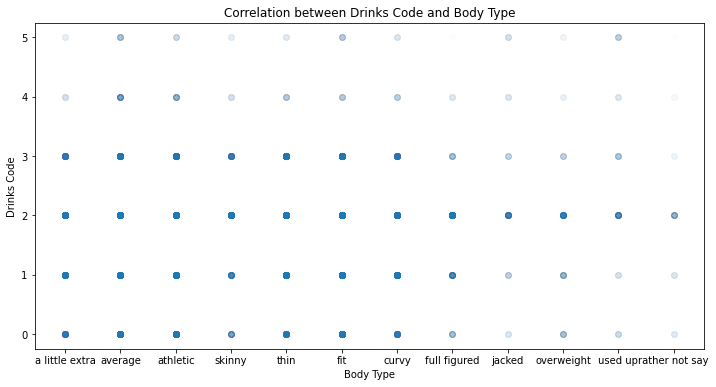

In [38]:
# Next, we have a loook at the correlation between the features and the label. However, I do not use the 
# aggregated body type but the 12 original body types.


f, ax = plt.subplots(figsize = (12,6))
plt.scatter(df_body_labels.body_type, df_body_labels.drinks_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drinks Code')
plt.title('Correlation between Drinks Code and Body Type')
plt.show()

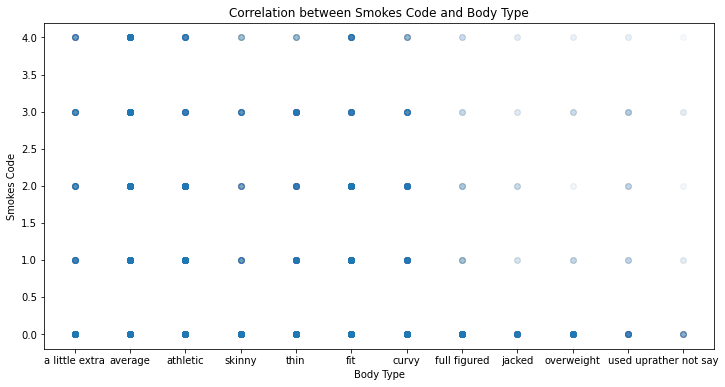

In [37]:
f, ax = plt.subplots(figsize = (12,6))
plt.scatter(df_body_labels.body_type, df_body_labels.smokes_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Smokes Code')
plt.title('Correlation between Smokes Code and Body Type')
plt.show()

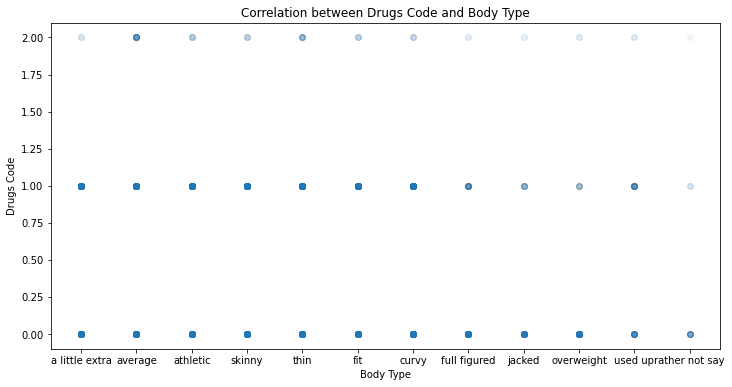

In [41]:
f, ax = plt.subplots(figsize = (12,6))
plt.scatter(df_body_labels.body_type, df_body_labels.drugs_code, alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drugs Code')
plt.title('Correlation between Drugs Code and Body Type')
plt.show()

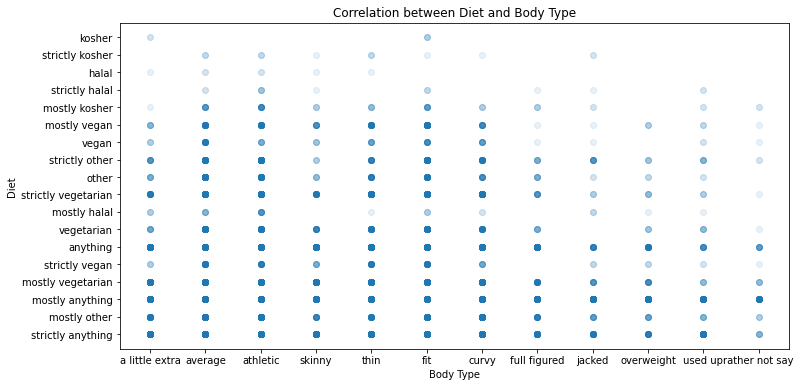

In [42]:
# To have a look at the correlation between body_type and diet we take just the two columns of the dataframe

df_body_diet = df_body_labels[['body_type', 'diet']]

f, ax = plt.subplots(figsize = (12, 6))
plt.scatter(df_body_labels.body_type, df_body_labels.diet, alpha = 0.1)
plt.xlabel('Body Type')
plt.ylabel('Diet')
plt.title('Correlation between Diet and Body Type')
plt.show()



In [51]:
# In the next steps I will try different classifiers to see which performs best. 
# First MLPClassifer

training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(training_data, training_labels.values.ravel())
print(clf.score(validation_data, validation_labels))


0.5609998016266614


0.5609998016266614
80


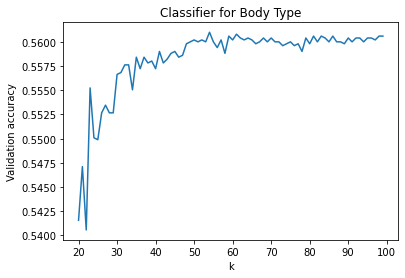

In [53]:
# Second: K-Neighbors. To find perfect K, I iterate over K from 20 to 100: 

training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)

accuracies = []
for k in range(20,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_labels.values.ravel())
    knn_score = knn.score(validation_data, validation_labels)
    accuracies.append(knn_score)

print(max(accuracies))
print(len(accuracies))

plt.plot(range(20,100), accuracies)
plt.xlabel('k')
plt.ylabel('Validation accuracy')
plt.title('Classifier for Body Type')
plt.show()

In [55]:
# Third: Random forests: 

forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, training_labels.values.ravel())
print(forest.score(validation_data, validation_labels))

0.5528664947431066


In [54]:
# Forth: SVC. We will try out different kernels and obtain the score for each: 

training_data, validation_data, training_labels, validation_labels = train_test_split(df_features_all, df_labels, test_size = 0.2, random_state = 100)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in kernels:
    svc = SVC(kernel = ker, gamma = 3, C = 1)
    svc.fit(training_data, training_labels.values.ravel())
    print(svc.score(validation_data, validation_labels))

0.5609998016266614
0.5592144415790518
0.5604046816107915
0.5020829200555446


In [ ]:
# Looks like the best score to be obtained is at roughly 0.561. 